Observations:
1. Most mice ate tested using Capomulin and Ramicane drug
2. There is a positive correlation between mouse weight and average tumor volume which means that as the mouse weight increases the average tumor volume also increases

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Downloads\Resources\Mouse_metadata.csv"
study_results_path = "Downloads\Resources\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID.
combined_data.loc[combined_data['Mouse ID']=='g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean_data = combined_data.loc[combined_data['Mouse ID']!='g989',:]
combined_clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
combined_clean_data['Mouse ID'].nunique()

248

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = combined_clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_vol_median = combined_clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_vol_var = combined_clean_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_vol_std = combined_clean_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_vol_sem = combined_clean_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_vol_mean,
                           "Median Tumor Volume":tumor_vol_median,
                           "Tumor Volume Variance":tumor_vol_var,
                           "Tumor Volume Std. Dev.":tumor_vol_std,
                           "Tumor Volume Std. Err.":tumor_vol_sem
                         })
summary_df

C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\144589689.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_vol_mean = combined_clean_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\144589689.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_vol_median = combined_clean_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\144589689.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to Fal

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = combined_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


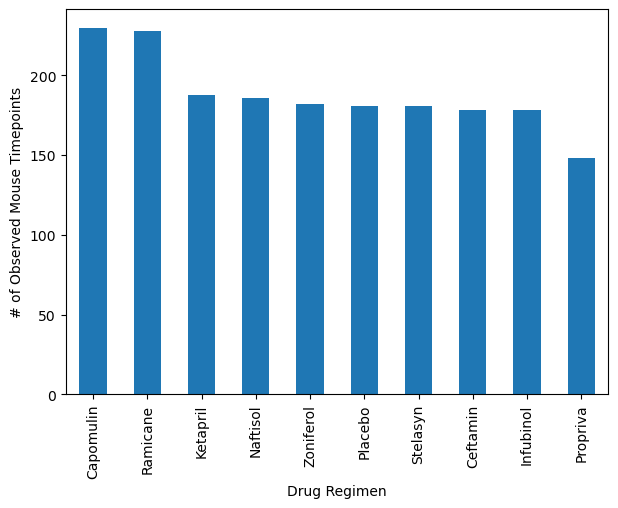

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
combined_clean_data.groupby('Drug Regimen').count().sort_values("Mouse ID", ascending = False)['Mouse ID'].plot(kind='bar',figsize=(7,5),xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints')
plt.show()

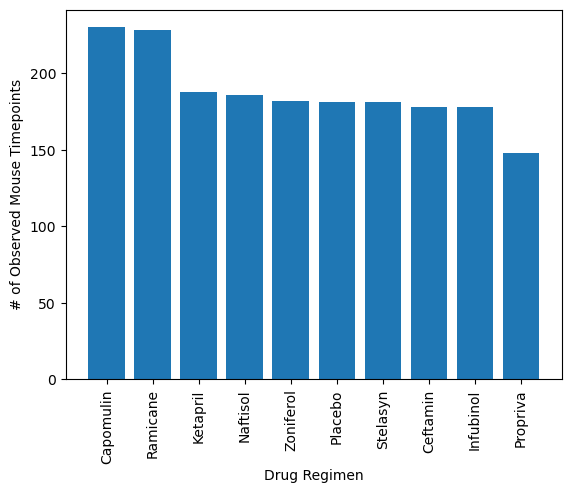

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = combined_clean_data.groupby('Drug Regimen').count().sort_values("Mouse ID", ascending = False).index
y_axis = combined_clean_data.groupby('Drug Regimen').count().sort_values("Mouse ID", ascending = False)['Mouse ID']
plt.bar(x_axis,y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

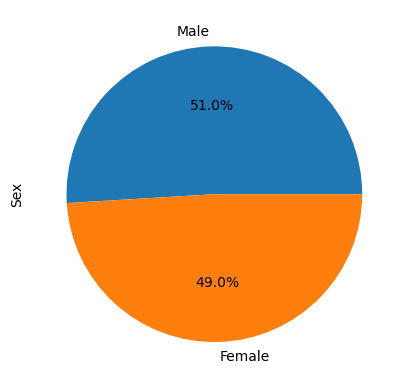

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = combined_clean_data['Sex'].value_counts()
sex.plot(kind='pie',autopct='%1.1f%%')
plt.show()

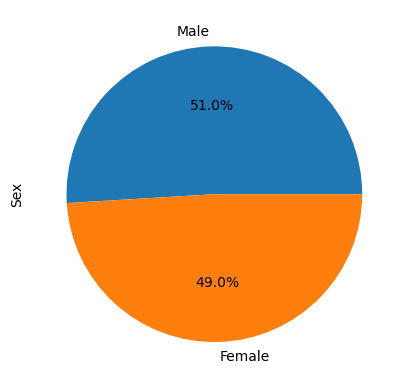

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = combined_clean_data['Sex'].value_counts()
plt.pie(sex,labels=sex.index,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

In [31]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = combined_clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(greatest_timepoint_df,combined_clean_data,how='left',on=['Mouse ID','Timepoint'])
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for name in treatment_names:
    if name == 'Capomulin':
        tumor_Capomulin= last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == name]['Tumor Volume (mm3)']
        quartiles = tumor_Capomulin.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        outliers = tumor_Capomulin.loc[(tumor_Capomulin < lower_bound) | (tumor_Capomulin > upper_bound)]
        print(f"{name}'s potential outliers:{outliers}")
    if name == 'Ramicane':
        tumor_Ramicane= last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == name]['Tumor Volume (mm3)']
        quartiles = tumor_Ramicane.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        outliers = tumor_Ramicane.loc[(tumor_Ramicane < lower_bound) | (tumor_Ramicane > upper_bound)]
        print(f"{name}'s potential outliers:{outliers}")
    if name == 'Infubinol':
        tumor_Infubinol= last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == name]['Tumor Volume (mm3)']
        quartiles = tumor_Infubinol.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        outliers = tumor_Infubinol.loc[(tumor_Infubinol < lower_bound) | (tumor_Infubinol > upper_bound)]
        print(f"{name}'s potential outliers:{outliers}")
    if name == 'Ceftamin':
        tumor_Ceftamin= last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == name]['Tumor Volume (mm3)']
        quartiles = tumor_Ceftamin.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
        outliers = tumor_Ceftamin.loc[(tumor_Ceftamin < lower_bound) | (tumor_Ceftamin > upper_bound)]
        print(f"{name}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


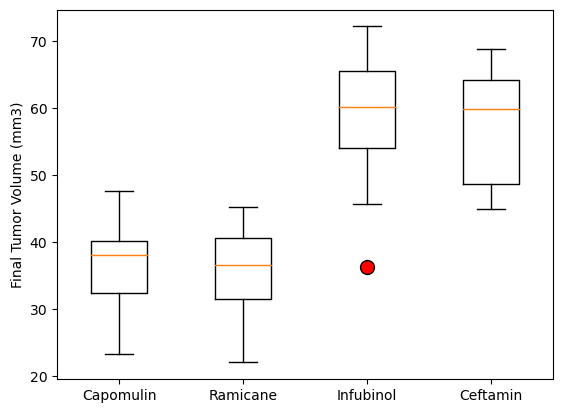

In [32]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_point = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([tumor_Capomulin,tumor_Ramicane,tumor_Infubinol,tumor_Ceftamin],labels=treatment_names,flierprops= red_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

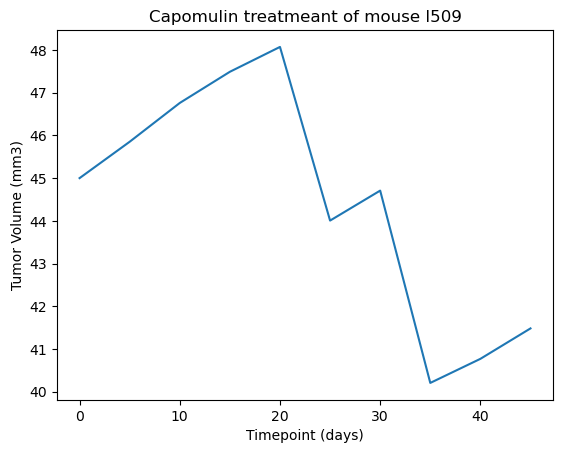

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(combined_clean_data.loc[combined_clean_data['Mouse ID']=='l509','Timepoint'],combined_clean_data.loc[combined_clean_data['Mouse ID']=='l509','Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')
plt.show()

C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\4169516144.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\4169516144.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.scatter(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])


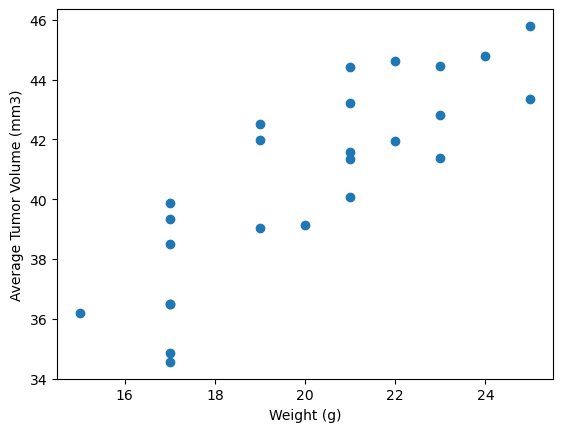

In [34]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df = combined_clean_data.loc[combined_clean_data['Drug Regimen']=='Capomulin',:]
plt.scatter(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\2938757747.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlation = st.pearsonr(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\2938757747.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlation = st.pearsonr(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
C:\Users\Winsa\AppData\Local\Temp\ipykernel_3560\2938757747.py:5: FutureWarning: The default value of numeric_on

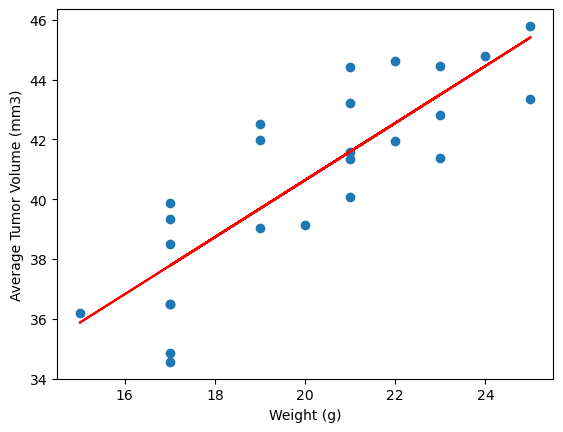

In [35]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
regress= scatter_df.groupby('Mouse ID').mean()['Weight (g)'] * slope + intercept
line_eq= f"y= {round(slope, 2)}x + {round(intercept, 2)}"
plt.scatter(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],scatter_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
plt.plot(scatter_df.groupby('Mouse ID').mean()['Weight (g)'],regress,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()